# Earth's lithospheric motions

### Author(s), contact(s), and dates:
- Author: Valentina Espinoza Fernández (University of Copenhagen)
- Email:  vf@ign.ku.dk
- Date:   9th of January 2024

## Exercise 1: Gravity profile of a buried object

Gravity is a powerful tool to study the Earth's interior. In this exercise, we will make use of some valuable information passed onto us by a Geophysicist. The Geophysicist has told us that beneath a hill, there is a body of high mineralogical value. The Geophysicist got as far as to measure the gravity anomaly along a profile from West to East. Measurements are stored in the DataFrame `grav_data` below. 

Perform the following exercises:

1. Plot the gravity anomaly and topography as a function of distance. Is there something odd about this profile? Based on what observation did the Geophysicist claim there to be a anomalous object?

2. Make the necessary corrections to the gravity data. Make an short argument for all corrections, the ones you did and the ones you did not (Latitudinal, Free-Air, Bouguer). Plot the corrected gravity data as a function of distance.

3. Determine whether the density of the alleged mineralized body is higher or lower than the surrounding rock.

4. Determine the depth of the mineralized body as a function of radius ($R$), assuming a spherical shape of density ($\Delta \rho = 3000~kg~m^{-3}$). 

Notes: 
- The gravity measurements were not done at the same height above the reference level (height = 0m). Corrections must be performed (e.g. Free Air, Bouguer). 
- Free Air Correction: $3.1 \cdot 10^{-6} m/s^2$ per meter of elevation
- Bouguer Correction:  $[2\pi G \rho]$ per meter of elevation, for the density ($\rho$) consider a average continental lithosphere.
- The expression that links gravity anomalies ($\Delta g$) with the depth ($h$) buried spherical objects is (Eq. 5.102 in Turcotte&Schubert):
$$\Delta g(h, x) = \frac{4\pi GR^3\Delta\rho}{3}\frac{h}{(x^2 + h^2)^{2/3}}$$

where x is the horizontal distance from the center of the sphere, $R$ is the radius of the sphere, $\Delta\rho$ is the density contrast between the sphere and the surrounding rock, and $G$ is the gravitational constant.

In [1]:
# Public dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Gravity and topography data from a profile
grav_data = pd.DataFrame({'distance':[0, 10, 20, 30, 70, 100, 0],  # meters
                          'height':[100, 90, 64, 37, 6, 0, 100],     # meters
                          'gravity':[10e-5, 10e-5, 10e-5, 10e-5, 10e-5, 10e-5, 10e-5]})    # m/s^2
grav_data

,distance,height,gravity
0,0,100,0.0001
1,10,90,0.0001
2,20,64,0.0001
3,30,37,0.0001
4,70,6,0.0001
5,100,0,0.0001
6,0,100,0.0001


Notice how the measurement at $x=0$ is performed twice to check for instrumental drift. No correction is needed in this case, but how would you correct, had there been some drift?

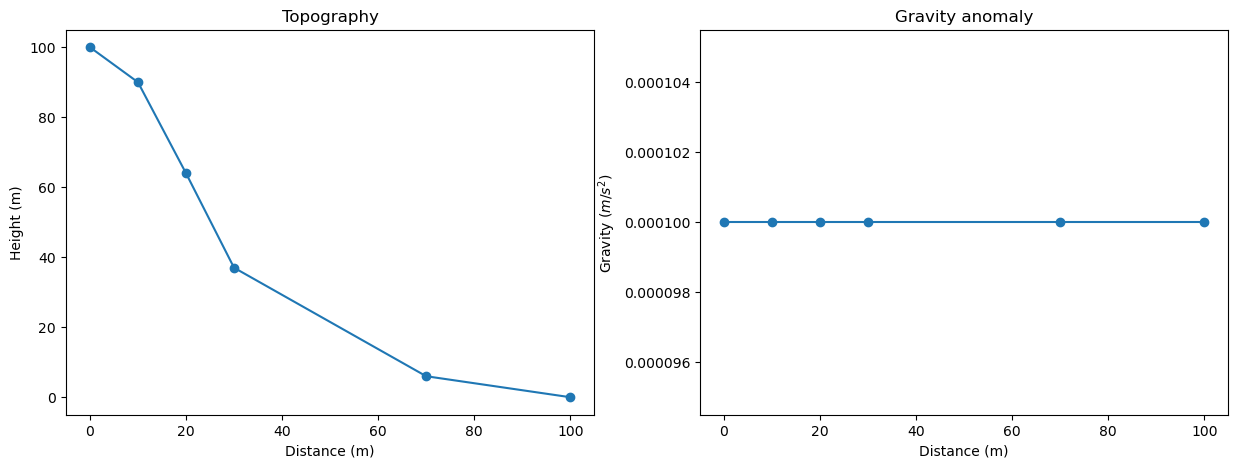

In [6]:
# Plot data
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(15,5))    # Figure with 1 row, 2 columns of plots

# Topography
ax1.plot(grav_data['distance'][:-1], grav_data['height'][:-1], '-o') # '-o' means to plot lines and points
ax1.set(xlabel = "Distance (m)",
        ylabel = "Height (m)",
        title = "Topography")

# Gravity

ax2.plot(grav_data['distance'][:-1], grav_data['gravity'][:-1], '-o')
ax2.set(xlabel = "Distance (m)",
        ylabel = "Gravity ($m/s^2$)",
        title = "Gravity anomaly");


# Would be kind of nice to have the y-axis in scientific notation. You can achieve this with ticklabel_format.
#ax2.ticklabel_format(axis="both", style="scientific", scilimits=(0,0))

### Free-air correction

we will start by applying a *free-air correction* to our observed gravity anomaly. For gravity data in $m/s^2$, the correction equals:

$$FAC = 3.1 \cdot 10^{-6} \cdot h(m) $$

In [ ]:
# Calculate free-air correction and sore the result in a new column
grav_data['FAC'] = 3.1e-6 * grav_data['height']
grav_data

### Bouguer correction
The Bouguer correction in $m/s^2$ is:
$$BC=[2\pi G \rho_{B} \; h]$$

In [ ]:
#Calculation of Bouguer correction:

rho = 0.0           # Put a value for the density of average continental lithosphere. Make sure to use SI units (kg*m-3).
G = 6.67*(1e-11)    # Gravitational constant [N*kg-2*m2]
 
grav_data['BC'] = 2 * np.pi * G * rho * grav_data['height']
grav_data

So far we have perfomed two corrections. The Geophysicist argues that there is no need for a *Latitudinal correction*. Why is that?

### Bouguer gravity anomaly
the Geophysicist supplied you with gravity anomaly data, i.e. he already subtracted the gravity reference from his measured gravity. Then:

$$\Delta g_B = g_{obs} + FAC - BC$$

In [ ]:
#Bouguer gravity anomaly:
grav_data['BA'] = grav_data['gravity'] + grav_data['FAC'] - grav_data['BC']
grav_data

In [ ]:
Hello

In [ ]:
#Plot gravity anomaly:
plt.plot(grav_data['distance'][:-1], grav_data['BA'][:-1], '-o', label='Bouguer gravity anomaly')
plt.title('Bouguer gravity anomaly')
plt.xlabel('Distance (m)')
plt.ylabel('Gravity ($m/s^2$)');

We have left to determine:

- Whether the density of the alleged mineralized body is higher or lower than the surrounding rock.
- The depth of the mineralized body as a function of density contrast, assuming a spherical shape. 

Hint: From the Bouguer gravity anomaly, we observe to things: (i) The anomaly is positive, and (ii) its highest is at the left. 

## BONUS

A little quantitative analysis will help us determine the density contrast and depth of the mineralized body.

In [ ]:
rho_sphere = 3000 # kg/m3
rho_ref = 2700 # kg/m3
G = 6.67*(1e-11)    # [N*kg-2*m2]
h_array = np.linspace(1, 100, 1000) # m

def radius_sphere(d_grav, rho_ref, rho_sphere, h, x):
    return ((d_grav * 3*(x**2 + h**2)**(3/2)) / (h*4*np.pi*G*(rho_sphere - rho_ref)))**(1/3)

def plot_depth_vs_radius(idx):
    row = grav_data.iloc[idx]
    radius_array = np.array([radius_sphere(row['BA'], rho_ref, rho_sphere, h, row['distance']) for h in h_array])
    plt.plot(h_array, radius_array)

for idx in range(5):
    plot_depth_vs_radius(idx)
 
plt.xlabel('Depth (m)')
plt.ylabel('Radius (m)')
plt.title('Depth vs Radius for buried sphere')    
plt.grid()